In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Using DELTA52 data

In [2]:
from idanalysis.idsdata import DELTA52Data

# create deltadata object
deltadata = DELTA52Data()

print(deltadata.subsecs)
print(deltadata.id_famname)
print(deltadata.period_length)
print(deltadata.nr_periods)

print(deltadata.folder_base_output)
print(deltadata.folder_base_kickmaps)
print(deltadata.folder_base_fieldmaps)


['ID10SB']
DELTA52
52.5
21
/home/gabriel/repos/idanalysis/delta52/results/data/
/home/gabriel/repos/idanalysis/delta52/kickmaps/
/media/gabriel/Dados/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/


In [16]:
# get kickmap file name for some configuration
kmap_fname = deltadata.get_kickmap_filename(meas_flag=True, dp=0, dgv=26.25)
print(kmap_fname)

# get fieldmap file name for some configuration
fmap_fname = deltadata.get_fmap_fname(dp=0, dgv=26.25)
print(fmap_fname)

/home/gabriel/repos/idanalysis/delta52/kickmaps/measurements/kickmap-ID_dp_pos00p000_dgv_pos26p250.txt
/media/gabriel/Dados/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4866.dat


### Usefull tools for fieldmap analysis

In [4]:
# Once you chose the desired configuration it is possible to load the fieldmap, to do so you can use the function get_fmap.  # noqa: E501
fmap = deltadata.get_fmap(dp=0, dgv=26.25)

/media/gabriel/Dados/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4866.dat


Text(0, 0.5, 'B [T]')

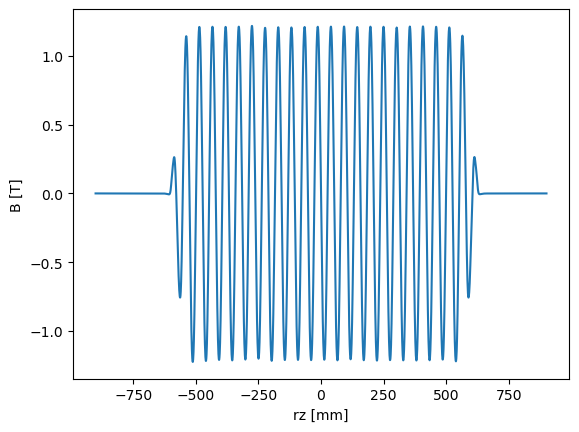

In [5]:
from idanalysis.analysis import FieldMapAnalysis

# Now, we can create a FieldMapAnalysis object
fmap_anl = FieldMapAnalysis(fmap)


# It is possible to get a specific field component along the undulator central axis.  # noqa: E501
b = fmap_anl.get_field_component_on_axis(field_component='by')
rz = fmap.rz
plt.plot(rz, b)
plt.xlabel('rz [mm]')
plt.ylabel('B [T]')


rz peak: 65.5 mm
b peak: -1.21422 T
rz peak: 65.5 mm
b peak: -1.21422 T


Text(0, 0.5, 'Roll-off [%]')

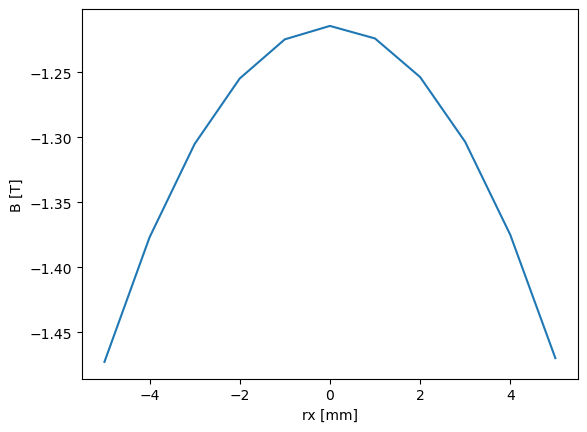

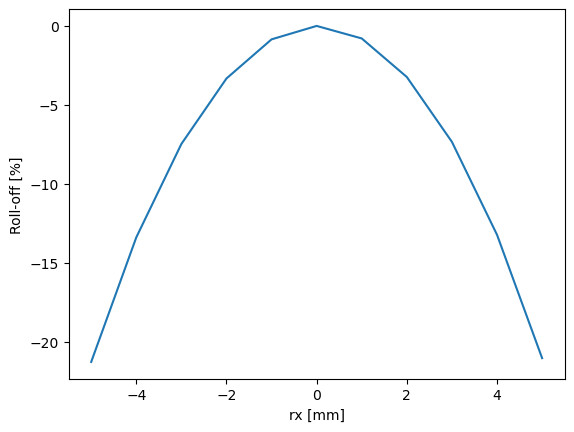

In [6]:
# It is also possible to verify the transverse behavior of the field.
r_transverse, b_transverse = fmap_anl.get_fmap_transverse_dependence(
    field_component='by', plane="x")

plt.figure()
plt.plot(r_transverse, b_transverse)
plt.xlabel('rx [mm]')
plt.ylabel('B [T]')


# Or check the field roll-off
rt_interp, bt_interp, roff = fmap_anl.get_fmap_roll_off(
    field_component='by', plane="x")
plt.figure()
plt.plot(rt_interp, roff)
plt.xlabel('rx [mm]')
plt.ylabel('Roll-off [%]')

### Usefull tools for RADIA model analysis

Text(0, 0.5, 'Roll-off [%]')

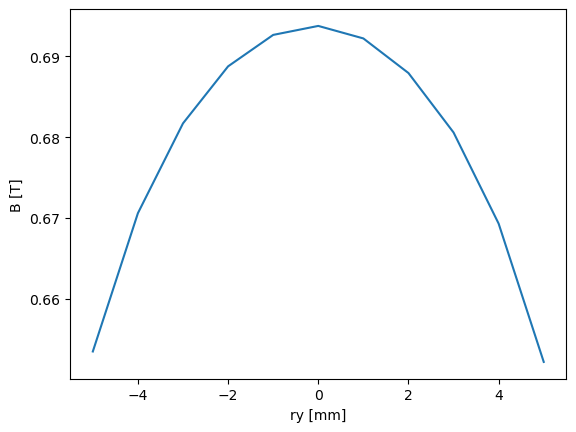

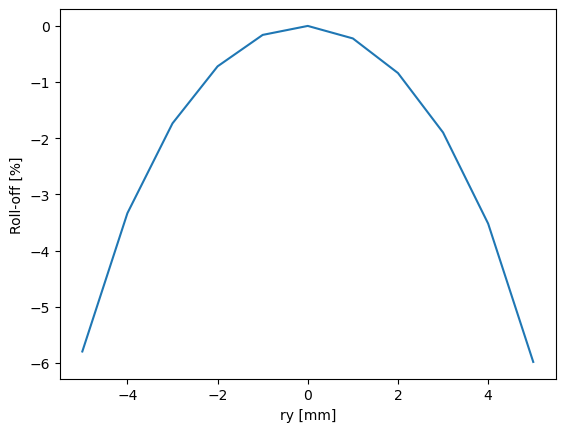

In [7]:
from idanalysis.idsmodels import DELTA52

# The user can also do analysis using the ID RADIA model
delta = DELTA52()
delta.generate_radia_model(dp=-10, dgv=12)
r_transverse, b_transverse, roff = delta.calc_radia_roll_off(
    field_component='by', r_transverse=np.linspace(-5, 5, 11), plane="y"
)



plt.figure()
plt.plot(r_transverse, b_transverse)
plt.xlabel('ry [mm]')
plt.ylabel('B [T]')

plt.figure()
plt.plot(r_transverse, roff)
plt.xlabel('ry [mm]')
plt.ylabel('Roll-off [%]')

### Trajectory analysis

Fieldmap setted as fieldsource
Calculating trajectory...
Rz extrapolation rz = 900.499693 > rz_max = 900.000000 [mm]
Rz extrapolation rz = 900.499693 > rz_max = 900.000000 [mm]
Rz extrapolation rz = 900.999693 > rz_max = 900.000000 [mm]


Text(0, 0.5, 'rx [mm]')

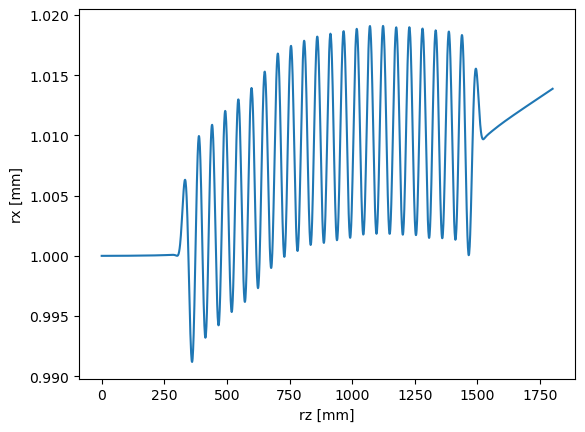

In [8]:
# Besides the field analysis the user can calculate the electron trajectory in a field given by a RADIA model or a fieldmap.  # noqa: E501

from idanalysis.analysis import TrajectoryAnalysis

# Let's first do some analysis on a fieldmap
traj_anl = TrajectoryAnalysis(fieldsource=fmap)
traj_anl.rk_s_step = 1
traj_anl.set_traj_configs()

traj_anl.traj_init_rx = 1e-3
traj_anl.traj_init_ry = 0
traj_anl.traj_init_px = 0
traj_anl.traj_init_py = 0

traj_anl.calculate_traj()
plt.plot(traj_anl.traj.s, traj_anl.traj.rx)
plt.xlabel('rz [mm]')
plt.ylabel('rx [mm]')


RADIA model setted as fieldsource
Calculating trajectory...


Text(0, 0.5, 'rx [mm]')

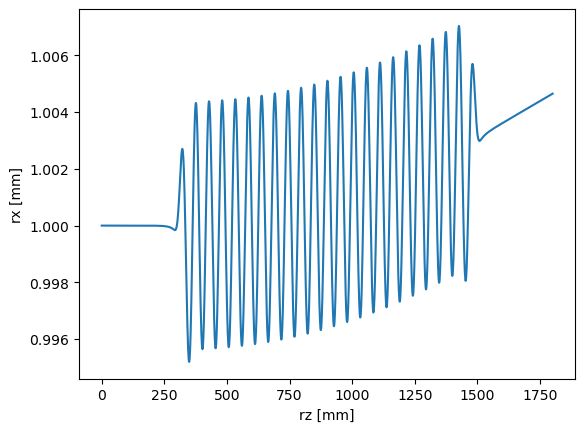

In [9]:
# Now, let's do the same calculation using a RADIA model
traj_anl = TrajectoryAnalysis(fieldsource=delta.model)
traj_anl.rk_s_step = 1
traj_anl.set_traj_configs()

traj_anl.traj_init_rz = -900
traj_anl.traj_max_rz = 900
traj_anl.traj_init_rx = 1e-3
traj_anl.traj_init_ry = 0
traj_anl.traj_init_px = 0
traj_anl.traj_init_py = 0

traj_anl.calculate_traj()
plt.plot(traj_anl.traj.s, traj_anl.traj.rx)
plt.xlabel('rz [mm]')
plt.ylabel('rx [mm]')

In [ ]:
# The user can calculate the kickmap using the generate_kickmap function of this class.  # noqa: E501

### Kickmap analysis

In [10]:
from idanalysis.analysis import KickmapAnalysis

# Once the user has a kickmap some analysis can be done using KickmapAnalysis
kick_anl = KickmapAnalysis(kmap_fname)

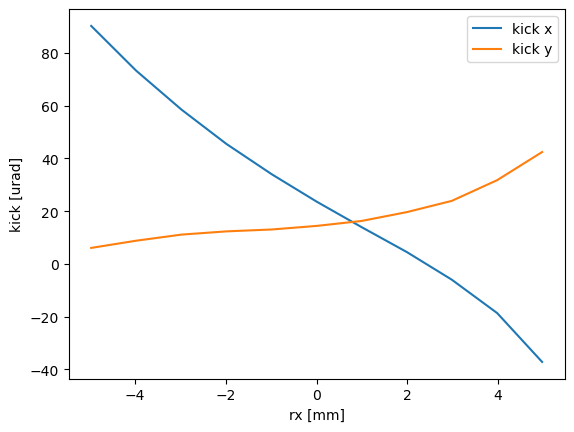

In [11]:
# It's possible to check the kickmap at a chosen plane
rx0, ry0, pxf, pyf, rxf, ryf = kick_anl.get_kicks_at_plane(
    indep_var="x", plane=0)

plt.figure()
plt.plot(1e3*rx0, 1e6*pxf, label='kick x')
plt.plot(1e3*rx0, 1e6*pyf, label='kick y')
plt.xlabel('rx [mm]')
plt.ylabel('kick [urad]')
plt.legend()

Text(0, 0.5, 'kick x [urad]')

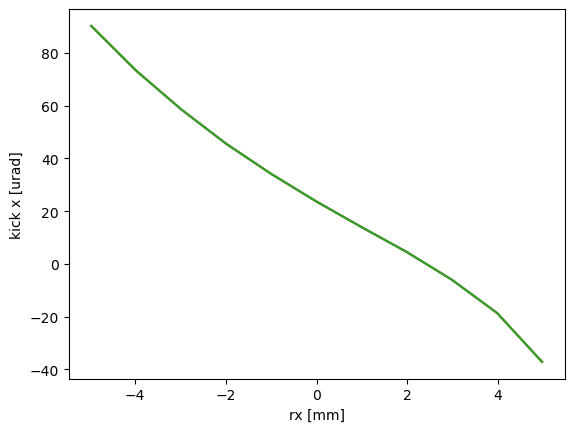

In [12]:
# Or even check the kickmap at all planes
rx0, ry0, pxf, pyf, rxf, ryf = kick_anl.get_kicks_all_planes(indep_var="x")
plt.plot(1e3*rx0, 1e6*pxf.T)
plt.xlabel('rx [mm]')
plt.ylabel('kick x [urad]')

Text(0, 0.5, 'kick x [urad]')

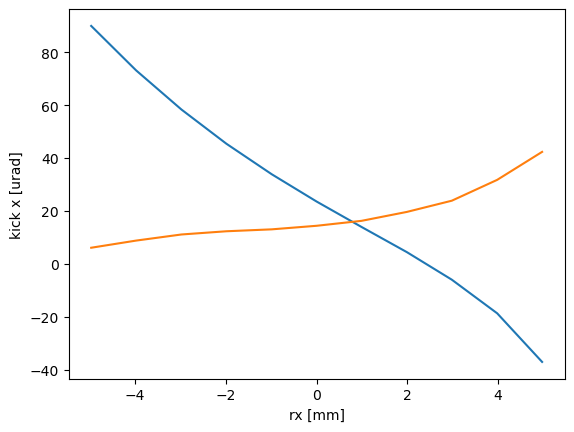

In [13]:
# This class also allow the user to check the tracking in the SI model using the chosen kickmap.  # noqa: E501

pxf_trk, pyf_trk, rxf_trk, ryf_trk = kick_anl.check_tracking_at_plane(
    kmap_fname=kmap_fname, subsec=deltadata.subsecs[0],
    fam_name=deltadata.id_famname)

plt.plot(1e3*rx0, 1e6*pxf_trk, label='kick x')
plt.plot(1e3*rx0, 1e6*pyf_trk, label='kick y')
plt.xlabel('rx [mm]')
plt.ylabel('kick x [urad]')

### Storage ring analysis

In [14]:
# If everything is OK with the tracking through the kickmap it is possible to verify the effects on the undulator in the beam dynamics  # noqa: E501
from idanalysis.analysis import StorageRingAnalysis
ring_anl = StorageRingAnalysis()

/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:300: RuntimeWarning: divide by zero encountered in double_scalars
  par.corrgainch, par.maxdeltakickch/_np.abs(dkickch).max())
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:302: RuntimeWarning: divide by zero encountered in double_scalars
  par.corrgaincv, par.maxdeltakickcv/_np.abs(dkickcv).max())
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:316: RuntimeWarning: divide by zero encountered in divide
  que = [(-par.maxkickch - kickch) / dkickch, ]
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:317: RuntimeWarning: divide by zero encountered in divide
  que.append((par.maxkickch - kickch) / dkickch)
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:321: RuntimeWarning: divide by zero encountered in divide
  que = [(-par.maxkickcv - kickcv) / dkickcv, ]
/home/gabriel/repos/apsuite/apsuite/orbcorr/orbit_correction.py:322: RuntimeWarning: divide by zero encount

Sucess
Sucess


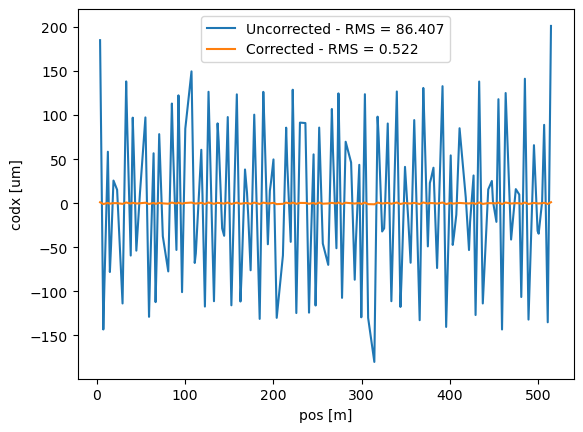

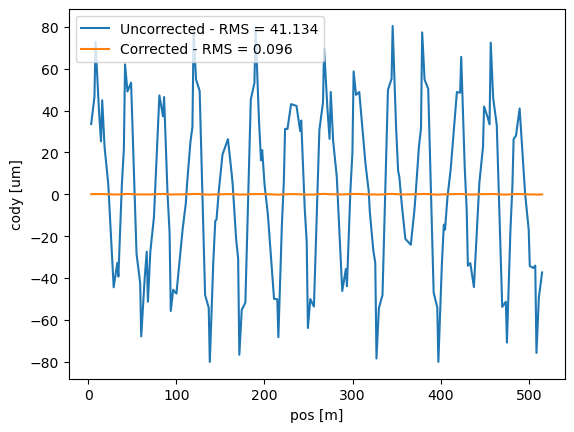

element indices for straight section begin and end:
ID10SB [2906, 2959]
local quadrupole fams: 
ID10SB {'QFB_ID': [2912, 2952], 'QDB1_ID': [2906, 2958], 'QDB2_ID': [2918, 2946]}
symmetrizing ID DELTA52 in subsec ID10SB
iteration #1, ΔK: [ 0.04188505  0.04375493 -0.2217566 ]
iteration #2, ΔK: [-0.02483528 -0.02917732  0.13958954]
iteration #3, ΔK: [ 0.01830229  0.02447199 -0.10698505]
iteration #4, ΔK: [ 0.00100543  0.00274186 -0.00779059]
iteration #5, ΔK: [ 0.00114385  0.00157656 -0.00674944]
iteration #6, ΔK: [-3.01190334e-05 -3.61176072e-05  1.70326696e-04]
iteration #7, ΔK: [ 1.31814361e-06  1.83190035e-06 -7.79550553e-06]
QFB_ID    ΔK:    +0.911 % 
QDB1_ID   ΔK:    -2.159 % 
QDB2_ID   ΔK:    +5.950 % 


init    tunes: 49.094104021 14.159243440
iter #1 tunes: 49.095961961 14.151785796
iter #2 tunes: 49.095961961 14.151785796
goal    tunes: 49.095966634 14.151790358

Not symmetrized optics :
dtunex: +1.43e-03
dtuney: +1.14e-04
bbetax: 0.859 % rms, 1.357 % absmax
bbetay: 0.068 % rms,

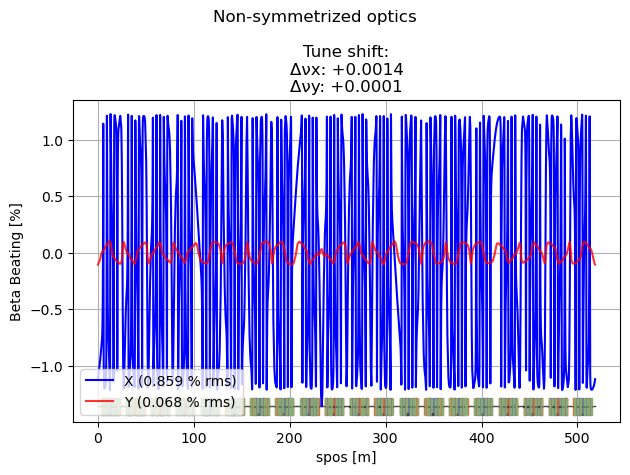

symmetrized optics but uncorrect tunes:
dtunex: -2e-03
dtuney: +7e-03
bbetax: 0.158 % rms, 3.320 % absmax
bbetay: 0.340 % rms, 7.325 % absmax



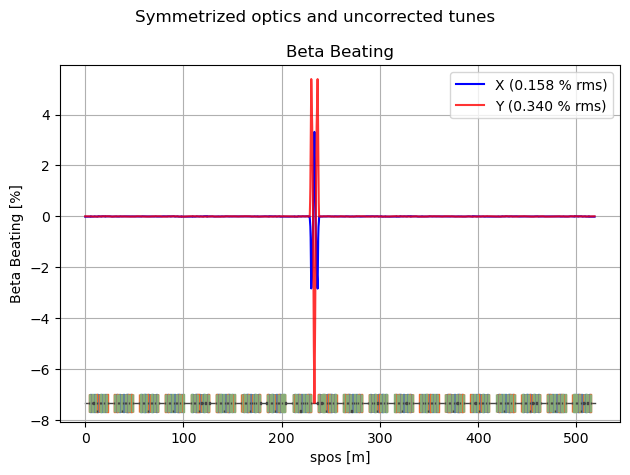

symmetrized optics and corrected tunes:
dtunex: -5e-06
dtuney: -5e-06
bbetax: 0.184 % rms, 3.231 % absmax
bbetay: 0.358 % rms, 7.085 % absmax


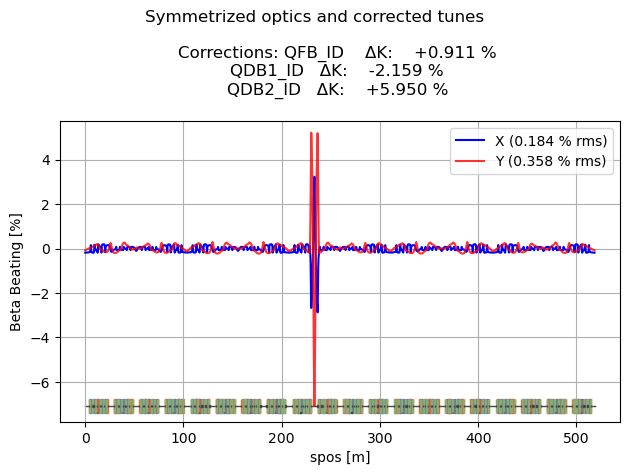

True

In [15]:
# Symmetrize the lattice during analysis
ring_anl.calc_type = ring_anl.CalcTypes.symmetrized

# Add delta52 id on ss 10
ring_anl.add_id_to_model(
    kmap_fname=kmap_fname, subsec=deltadata.subsecs[0],
    fam_name=deltadata.id_famname)

ring_anl.plot_orbcorr = True
ring_anl.run_correction_algorithms()


nrturns      : 2048
turn_by_turn : True
x_nrpts      : 40
y_nrpts      : 20
x_min [m]    : -0.012
x_max [m]    : 0
y_min [m]    : 0
y_max [m]    : 0.004
de_offset    : 0
xl_off [rad] : 1e-05
yl_off [rad] : 1e-05
intnux       : 49.00 (for graphs)
intnuy       : 14.00 (for graphs)



 OSCILLATION DE L''ENCADREMENT ?


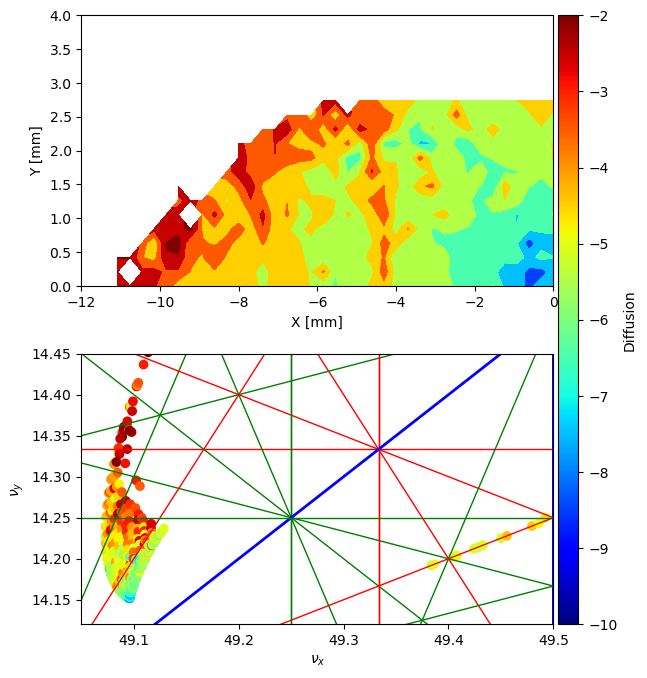

In [12]:
ring_anl.analysis_dynapt()

### Equilibrium parameters analysis

In [1]:
from idanalysis.eqparams import InsertionParams, EqParamAnalysis, SiriusIDS
import matplotlib.pyplot as plt
import pymodels
from scipy.integrate import cumtrapz

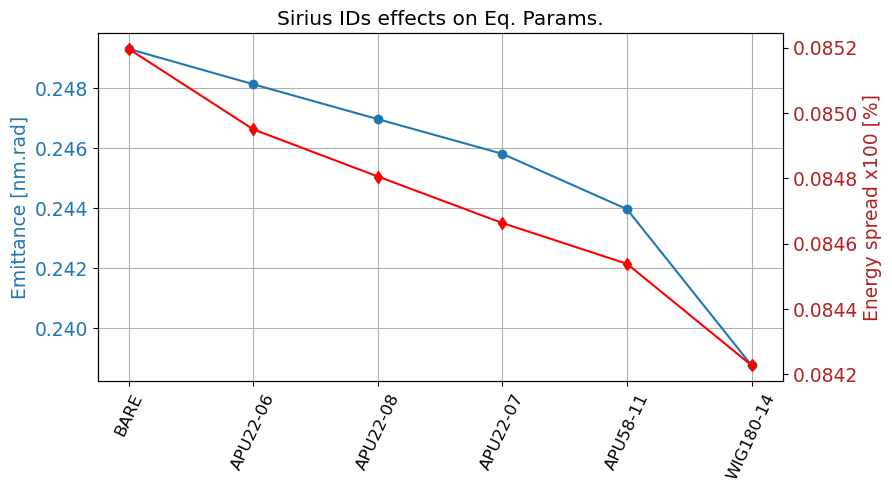

In [2]:
id1 = InsertionParams()
id1.fam_name = 'APU22'
id1.period = 22
id1.by_peak = 0.68
id1.bx_peak = 0.68
id1.nr_periods = 50
id1.straight_section = "ID06SB"

id2 = InsertionParams()
id2.fam_name = 'APU22'
id2.period = 22
id2.by_peak = 0.68
id2.nr_periods = 50
id2.straight_section = "ID08SB"

id3 = InsertionParams()
id3.fam_name = 'APU22'
id3.period = 22
id3.by_peak = 0.68
id3.nr_periods = 50
id3.straight_section = "ID07SB"

id4 = InsertionParams()
id4.fam_name = 'APU58'
id4.period = 58
id4.ky = 5.2
id4.length = 1
id4.straight_section = "ID11SB"

id5 = InsertionParams()
id5.fam_name = 'WIG180'
id5.period = 180
id5.by_peak = 1
id5.nr_periods = 13
id5.straight_section = "ID14SB"


eqparam = EqParamAnalysis()
si = pymodels.si.create_accelerator()
si = pymodels.si.fitted_models.vertical_dispersion_and_coupling(si)
eqparam.set_model(si)

eqparam.add_id_to_lattice(id1)
eqparam.add_id_to_lattice(id2)
eqparam.add_id_to_lattice(id3)
eqparam.add_id_to_lattice(id4)
eqparam.add_id_to_lattice(id5)


eqparam.plot_ids_effects_emit_espread()

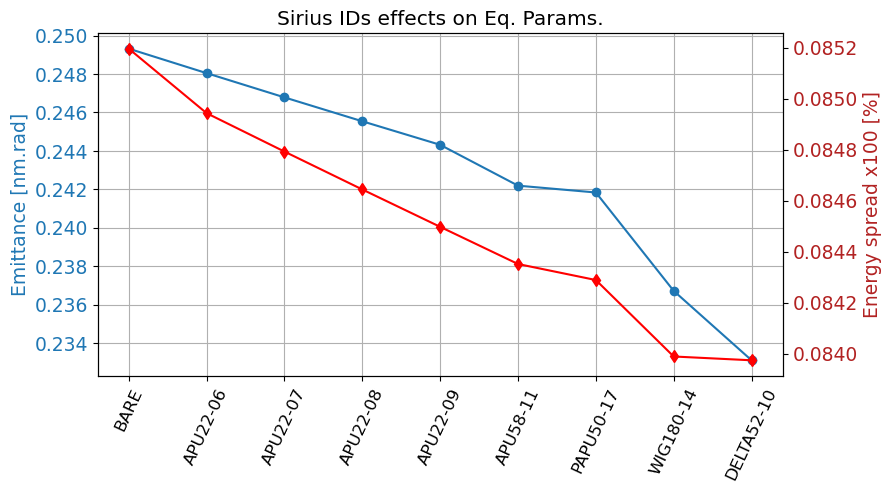

In [3]:
si_ids = SiriusIDS()
ids = si_ids.set_current_ids()
eqparam.ids = ids
eqparam.plot_ids_effects_emit_espread()

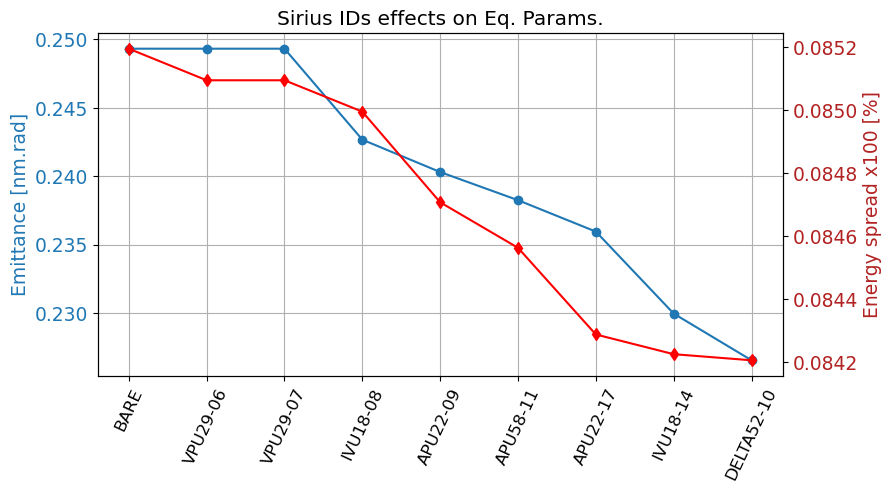

In [4]:
si_ids = SiriusIDS()
ids = si_ids.set_phase1_ids()
eqparam.ids = ids

eqparam.plot_ids_effects_emit_espread()